<a href="https://colab.research.google.com/github/NilaanL/Koala_Coders/blob/master/intelliHack_koalacoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.externals import joblib



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# **Data preparation**

In [2]:

full_data = pd.read_csv('raj.csv')

#Removing unnecessary string values in cells
for row in range(full_data.shape[0]):
    for column in range(full_data.shape[1]):
        if full_data.iat[row,column]=='?':
            full_data.iat[row,column] = np.nan
            
#Converting string values of 3 columns to np.float64
full_data.loc[:,['rc','wc','pcv']] = full_data.loc[:,['rc','wc','pcv']].astype(np.float64)

full_data.drop(['id'],axis = 1,inplace=True)

full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
pcc               400 non-null object
ba                400 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               329 non-null float64
wc                294 non-null float64
rc                269 non-null float64
htn               400 non-null object
dm                400 non-null object
cad               400 non-null object
appet             400 non-null object
pe                400 non-null object
ane               400 non-null object
classification    400 non-null object
dtypes:

In [3]:
print("Number of ckd patients in the dataset: ",(full_data['classification']=='ckd').astype(np.int64).values.sum())

print("Number of people without ckd in the dataset: ",(full_data['classification']=='notckd').astype(np.int64).values.sum())

Number of ckd patients in the dataset:  250
Number of people without ckd in the dataset:  150


In [0]:


full_data['classification']=(full_data['classification']=='ckd').astype(np.float64)

full_data['pcc']=(full_data['pcc']=='present').astype(np.float64)

full_data['ba']=(full_data['ba']=='present').astype(np.float64)
full_data['htn']=(full_data['htn']=='yes').astype(np.float64)
full_data['dm']=(full_data['dm']=='yes').astype(np.float64)
full_data['cad']=(full_data['cad']=='yes').astype(np.float64)
full_data['appet']=(full_data['appet']=='good').astype(np.float64)
full_data['pe']=(full_data['pe']=='yes').astype(np.float64)
full_data['ane']=(full_data['ane']=='yes').astype(np.float64)


# **Feature** **Extraction**

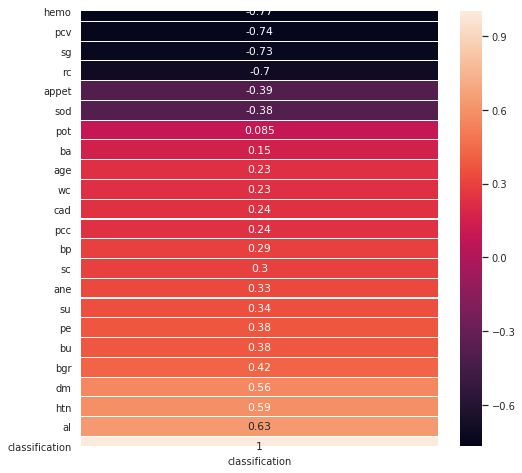

In [5]:
corr_matrix=full_data.corr()['classification'].sort_values().to_frame()
plt.figure(figsize=(8,8))
plt.rcParams["axes.labelsize"] = 15
sns.set(font_scale=0.9)
sns.heatmap(corr_matrix, annot = True ,linewidths=.1)
plt.show()

We have chosen **10 features** to use in our final model. Initially there were 24 features. We chose these features based on their **pearson's correlation coefficient** (highest positive and negative coefficients).


The features we have chosen, along with their corellations are:

> Albumin (al) :    **0.63**


> Specific Gravity (sg) :    **-0.73**



> Hemoglobin (hemo) : **-0.77**


> Packed cell Volume (pcv) : **-0.74**


> Red Blood Cell Count (rc) : **-0.7**


> Hypertension (htn) : **0.59**


> Diabetes Mellitus (dm) : **0.56**



> Blood Glucose Random (bgr) : **0.42**


> Blood Urea (bu) : **0.38**


> Appetite (appet) : **-0.39**























In [0]:
#Removing id column and splitting fataset into features and target
X = full_data.drop(['classification'],axis = 1,inplace=False)
y = full_data[['classification']]

#Splitting dataset into Train set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =5)


#Categorical attributes
cat_attr = []

#Numerical attributes
num_attr= []

for column,dtype in zip(X_train.columns,X_train.dtypes.values):
    if dtype == 'O':
        cat_attr.append(column)
    else:
        num_attr.append(column)


num_pipeline = Pipeline([('impute',SimpleImputer(strategy = 'median')),('normalize',StandardScaler())])

transformer = ColumnTransformer([('num',num_pipeline,num_attr),('cat','passthrough',cat_attr)])

#Prepared features
X_prepared = transformer.fit_transform(X_train)




In [0]:
y_train = y_train.to_numpy(np.float64).ravel()
y_test = y_test.to_numpy(np.float64).ravel()

In [8]:
svc = SVC(kernel='linear')
svc.fit(X_prepared,y_train)
y_pred_svc = svc.predict(transformer.transform(X_test))

print(accuracy_score(y_test,y_pred_svc))

0.9916666666666667


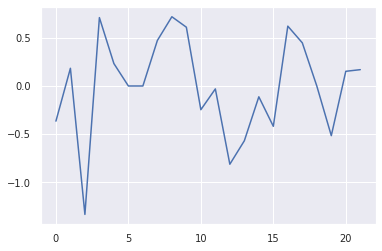

In [9]:
print(plt.plot(svc.coef_.ravel()))

In [10]:
sgd = SGDClassifier()
sgd.fit(X_prepared,y_train)
y_pred_sgd = sgd.predict(transformer.transform(X_test))

print(accuracy_score(y_test,y_pred_sgd))

0.9833333333333333


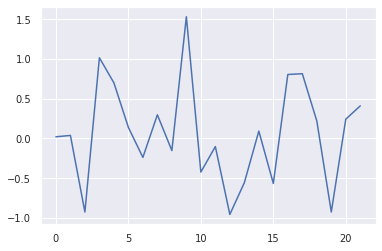

In [11]:
plt.plot(sgd.coef_.ravel()/20)

In [12]:
def takeSecond(elem):
    return elem[1]

for i in sorted(list(zip(X.columns,svc.coef_.ravel())),key = takeSecond):
  print(i,"\n")

('sg', -1.3345415330618615) 

('hemo', -0.8130286848472786) 

('pcv', -0.5693477571668434) 

('appet', -0.5160505360192034) 

('rc', -0.41900555654163557) 

('age', -0.36523745384568357) 

('sod', -0.24645818124951588) 

('wc', -0.11231496519113252) 

('pot', -0.030459351660186162) 

('cad', -1.6653345369377348e-16) 

('pcc', -1.5265566588595902e-16) 

('ba', -6.938893903907228e-17) 

('pe', 0.1525502132367634) 

('ane', 0.1697353495571883) 

('bp', 0.18397712818466488) 

('su', 0.23298723014466205) 

('dm', 0.4484303508824792) 

('bgr', 0.4732062887270101) 

('sc', 0.6108490321061042) 

('htn', 0.6218421959630716) 

('al', 0.7105741847867241) 

('bu', 0.7195398245071244) 



In [13]:
for j in sorted(list(zip(X.columns,sgd.coef_.ravel())),key = takeSecond):
  print(j,'\n')

('hemo', -19.121772815453035) 

('appet', -18.5112314819151) 

('sg', -18.509623933509484) 

('rc', -11.32791668213417) 

('pcv', -11.1379573563396) 

('sod', -8.455849243923483) 

('ba', -4.768734431678865) 

('bu', -3.0469382207290434) 

('pot', -2.0439532320225453) 

('age', 0.4215688025454537) 

('bp', 0.7675044921285901) 

('wc', 1.8511398166922859) 

('pcc', 2.7864029258044396) 

('cad', 4.411451116466548) 

('pe', 4.85684783085591) 

('bgr', 5.961874627271092) 

('ane', 8.214054213192991) 

('su', 14.006718949020646) 

('htn', 16.108341918800537) 

('dm', 16.306155556076614) 

('al', 20.321110795664502) 

('sc', 30.64616807571536) 



Considering the coefficients assigned to each of the attributes by the linear models: the linear kernel SVC and the SGDClassifier, the highest coefficients in the above linear models have been given to : **sg, hemo, pcv, al, htn, dm, appet**, along with **bgr, bu and rc**.
Thus this is congruent to the results obtained using the correlation matrix.

# **Model Training and Cross Validation**

In [0]:
X = X[['sg', 'hemo', 'pcv', 'al','rc','bgr','bu', 'htn', 'dm', 'appet']]

num_attr_new = ['sg','hemo','pcv','al','rc','bgr','bu']
cat_attr_new = ['htn','dm','appet']

#Splitting dataset into Train set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = random.randint(1,1000))

y_train = y_train.to_numpy(np.float64).ravel()
y_test = y_test.to_numpy(np.float64).ravel()

num_pipeline = Pipeline([('impute',SimpleImputer(strategy = 'median')),('normalize',StandardScaler())])

transformer = ColumnTransformer([('num',num_pipeline,num_attr_new),('cat','passthrough',cat_attr_new)])

#Prepared features
X_prepared = transformer.fit_transform(X_train)

In [0]:
svc_cv = SVC(kernel='linear')

scores = cross_val_score(svc_cv, X_prepared, y_train,scoring='accuracy',cv=3)

In [16]:
print(scores)

[0.9893617  0.95744681 0.98913043]


# **Testing**

In [17]:
svc_final = SVC(kernel='linear')
svc_final.fit(X_prepared,y_train)
y_pred = svc_final.predict(transformer.transform(X_test))

print("Test Accuracy:   ",accuracy_score(y_test,y_pred))

Test Accuracy:    0.9916666666666667


In [18]:
confusion_matrix(y_test,y_pred)

array([[37,  0],
       [ 1, 82]])